<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0428/07_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

fish = pd.read_csv("fish.csv")

bream = fish[fish['class']==1] #fish['class']에서 1인 값
smelt = fish[fish['class']==0] #fish['class']에서 0인 값

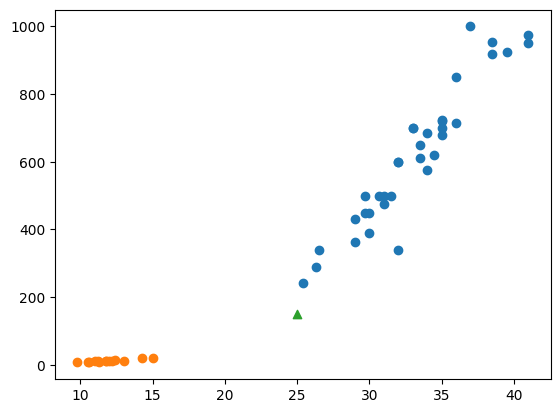

In [17]:
import matplotlib.pyplot as plt

plt.scatter(bream['length'], bream['weight'])
plt.scatter(smelt['length'], smelt['weight'])
# scatter (x축, y축)
# 추가 길이가 25, 무게가 150 인 것은? ↓
plt.scatter(25,150, marker = '^') # 녹색삼각형 위치 : 도미

In [8]:
data = fish[['length', 'weight']].to_numpy() # 문제지, 2개일 때는 겹대괄호
target = fish['class'].to_numpy() #정답지

In [15]:
from sklearn.model_selection import train_test_split #시험데이터 제작 라이브러리

train_input, test_input, train_target, test_target = train_test_split(data,target)
# 순서 중요 : 학습문제지, 시험문제지, 학습정답지, 시험정답지 순
# train_test_split(문제지,정답지) :뒤에 숫자 X 면 학습 75% 시험 25%로 구성

In [24]:
from sklearn.neighbors import KNeighborsClassifier 
# 모델 생성 위함, 대소문자 구분 필수

knn = KNeighborsClassifier() # 모델 생성
knn.fit(train_input, train_target) # 훈련 문제지, 정답지로 훈련
knn.score(test_input, test_target) # 시험 문제지, 정답지로 평가
# 1.0 = 100점

1.0

In [18]:
knn.predict([[25,150]]) # predict : 데이터 넣어서 값 예측
# 길이 25, 무게 150? 
# 행렬 [0] : class ==0 >> 빙어 / 위에서 그래프 보면 도미임
# 오답 이유 : 길이는 5씩 늘어나는데 무게는 200씩 늘어남
# 길이 10 늘어난 것이 무게 200 늘어난것보다 낮아서 빙어랑 비슷하다고 예측
# 컴퓨터는 숫자가 큰 데이터를 더 중요시
# 표준화 필요

array([0])

In [29]:
# 표준화 직접 구해봄 (라이브러리도 있음)

import numpy as np
mean = np.mean(train_input, axis = 0) 
# np.mean(train_input, axis = 0) : train_input의 평균을 행방향으로 구하라
#  axis = 1 : 행방향
std = np.std(train_input, axis = 0) 
# np.std(train_input, axis = 0) : train_input의 표준편차을 행방향으로 구하라

# 표준화(중 StandardScaler) :데이터 - 데이터 평균 / 데이터 표준편차
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std 
# 시험데이터에 훈련데이터 평균에 훈련데이터로 표준편차로 나누는가
# 시험데이터는 모르는 데이터(지금은 가정)라서 컴퓨터가 예측하려면 훈련데이터를 기반으로 해야함
# 따라서 시험데이터라도 시험데이터는 모르는 데이터라 훈련데이터의 평균을 빼고 훈련데이터의 표준편차로 나눈다

In [33]:
knn = KNeighborsClassifier() # 모델 새로운 것으로 생성
knn.fit(train_scaled, train_target) # 훈련은 표준화 훈련데이터, 훈련 정답지
knn.score(test_scaled, test_target) # 평가는 표준화 시험데이터, 시험 정답지

1.0

In [34]:
# 길이 25, 무게 150인 데이터 예측 
# 이번에는 데이터 - 데이터 평균/ 데이터 표준편차 해야 함

new = ([25, 150] - mean) / std
new

array([-0.22721694, -0.93381908])

In [35]:
knn.predict([new]) # new의 데이터 넣고 값 예측
# 이번에는 도미로 예측

array([1])